In [1]:
# Import packages

import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
from earthpy.plot import es
import seaborn as sns
from matplotlib import patches as mpatches, colors
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
from shapely.geometry import Point,mapping,box
import rasterio as rio
import rasterstats as rs
# Plotting extent is used to plot raster & vector data together
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.mask import mask
import earthpy.mask as em
from rasterio.warp import calculate_default_transform, reproject, Resampling
from pyproj import Proj, transform
from glob import glob

import warnings
warnings.filterwarnings('ignore')

# Get data and set working directory
# data = et.data.get_data('spatial-vector-lidar')
# os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))
# Downloading from https://ndownloader.figshare.com/files/12459464 
# Extracted output to /root/earth-analytics/data/spatial-vector-lidar/.

# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")

You can use the Earthpy function called plot_rgb() to quickly plot 3 band composite images. This function has several key arguments including

- arr: a numpy array in rasterio band order (bands first)
- rgb: the three bands that you wish to plot on the red, green and blue channels respectively
- title: OPTIONAL - if you want to add a title to your plot.
- Similar to plotting with geopandas, you can provide an ax= argument as well to plot your data on a particular matplotlib axis.

# Landsat Data

In [5]:
import pprint

# Load & plot the data

sample_raster_path = "./data/Full_Congo_Hansen/2012/Hansen_GFC2013_first_10N_020E.tif"

with rio.open(sample_raster_path) as sample_raster_src:
    # Masked = True sets no data values to np.nan if they are in the metadata
    sample_raster = sample_raster_src.read()
    sample_raster_meta = sample_raster_src.profile
    pp = pprint.PrettyPrinter(indent=4)
    pp.pprint(sample_raster_src.bounds)
    pp.pprint(sample_raster_src.crs)

BoundingBox(left=19.9998611111111, bottom=-0.0001388888888929074, right=30.000138888888877, top=10.000138888888884)
CRS.from_epsg(4326)


In [7]:
sample_raster_meta

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 36001, 'height': 36001, 'count': 4, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0002777777777777778, 0.0, 19.9998611111111,
       0.0, -0.0002777777777777778, 10.000138888888884), 'tiled': False, 'compress': 'lzw', 'interleave': 'pixel'}

In [9]:
sample_raster.shape

(4, 36001, 36001)

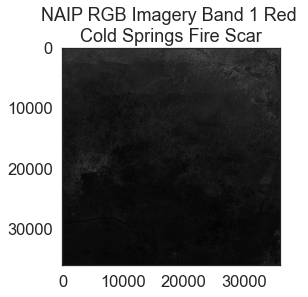

In [10]:
fig, ax = plt.subplots()

ax.imshow(sample_raster[0], 
          cmap="Greys_r")

ax.set_title("NAIP RGB Imagery Band 1 Red \nCold Springs Fire Scar")

plt.show()

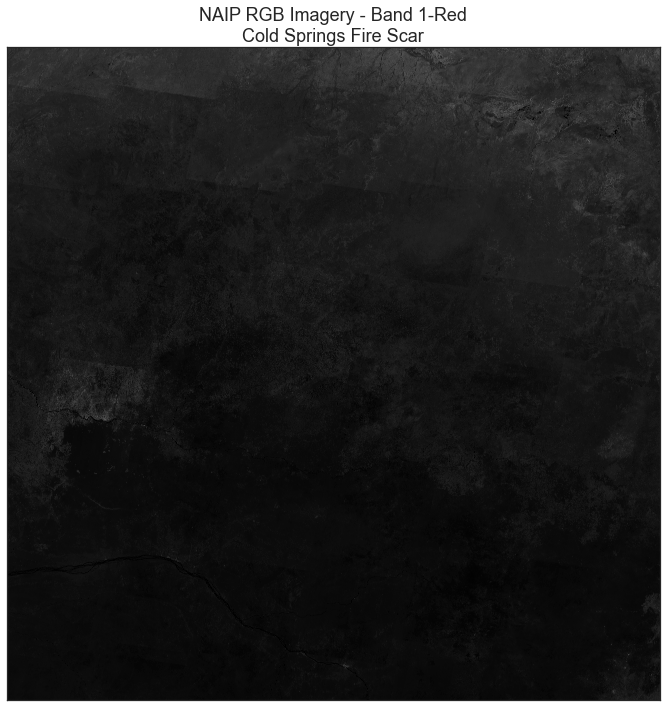

In [11]:
ep.plot_bands(sample_raster[0],
              title="NAIP RGB Imagery - Band 1-Red\nCold Springs Fire Scar",
              cbar=False)
plt.show()

In [15]:
pp.pprint(sample_raster_meta)

{   'compress': 'lzw',
    'count': 4,
    'crs': CRS.from_epsg(4326),
    'driver': 'GTiff',
    'dtype': 'uint8',
    'height': 36001,
    'interleave': 'pixel',
    'nodata': None,
    'tiled': False,
    'transform': Affine(0.0002777777777777778, 0.0, 19.9998611111111,
       0.0, -0.0002777777777777778, 10.000138888888884),
    'width': 36001}


In [17]:
print(sample_raster.min())
print(sample_raster.max())

0
255


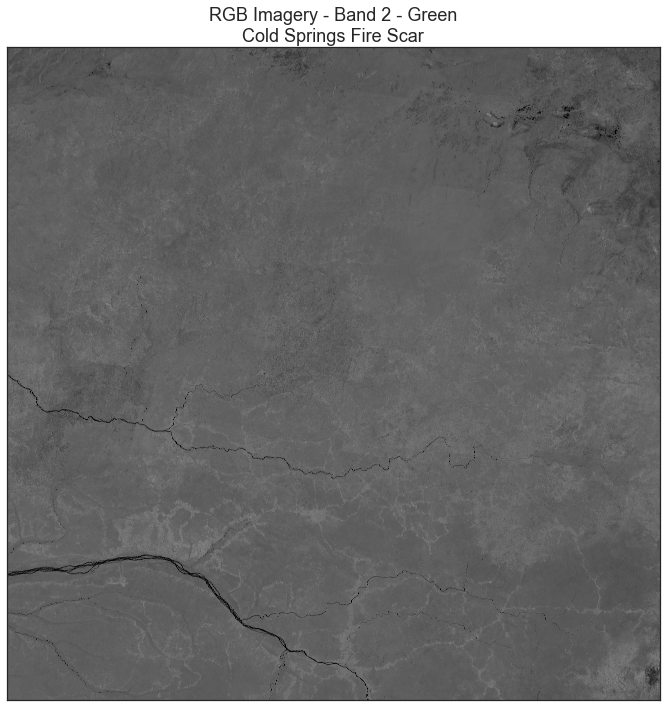

In [18]:
# Plot band 2 - green
ep.plot_bands(sample_raster[1],
              title="RGB Imagery - Band 2 - Green\nCold Springs Fire Scar",
              cbar=False)
plt.show()

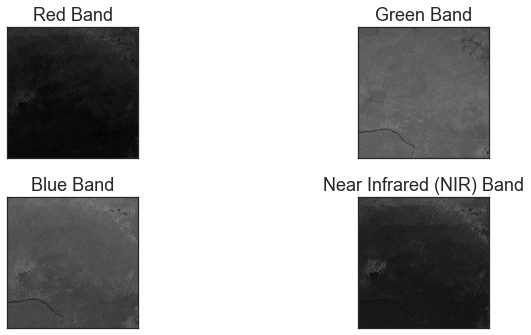

In [19]:
titles = ["Red Band", "Green Band", "Blue Band", "Near Infrared (NIR) Band"]

# Plot all bands using the earthpy function
ep.plot_bands(sample_raster, 
              figsize=(12, 5), 
              cols=2,
              title=titles,
              cbar=False)
plt.show()

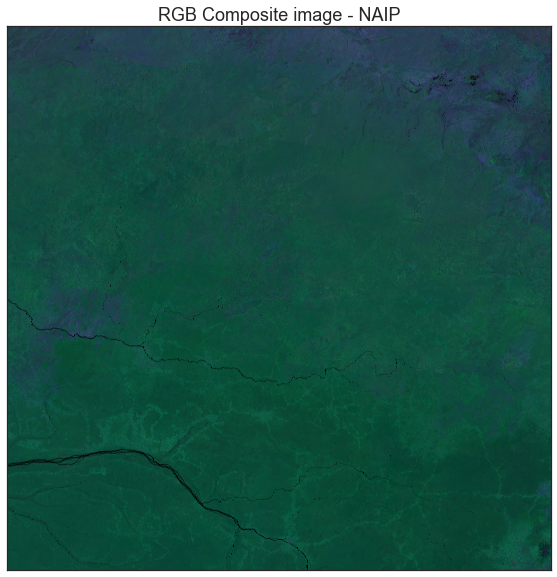

In [21]:
ep.plot_rgb(sample_raster,
            rgb=[0, 1, 2],
            title="RGB Composite image - NAIP")
plt.show()

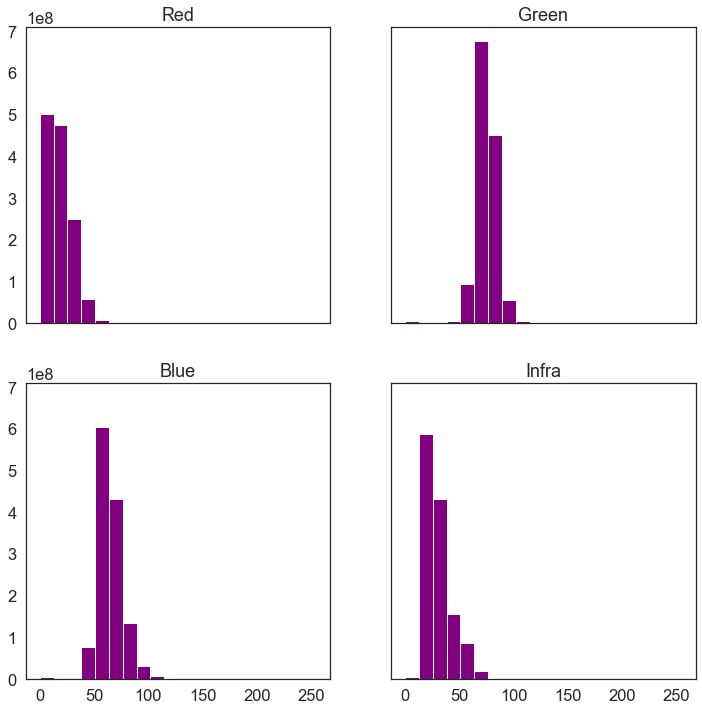

In [20]:
# Plot all band histograms using earthpy
band_titles = ["Red","Green","Blue","Infra"]

ep.hist(sample_raster,
        title=band_titles)

plt.show()

# Landsat Data - with Windowed (Compressed Version) 

In [23]:
import pprint

# Load & plot the data

window = rio.windows.Window(1024, 1024, 2560, 2560)

sample_raster_path = "./data/Full_Congo_Hansen/2012/Hansen_GFC2013_first_10N_020E.tif"

with rio.open(sample_raster_path) as sample_raster_src:
    # Masked = True sets no data values to np.nan if they are in the metadata
    sample_raster = sample_raster_src.read(window=window)
    sample_raster_meta = sample_raster_src.profile
    pp = pprint.PrettyPrinter(indent=4)
    pp.pprint(sample_raster_src.bounds)
    pp.pprint(sample_raster_src.crs)

BoundingBox(left=19.9998611111111, bottom=-0.0001388888888929074, right=30.000138888888877, top=10.000138888888884)
CRS.from_epsg(4326)


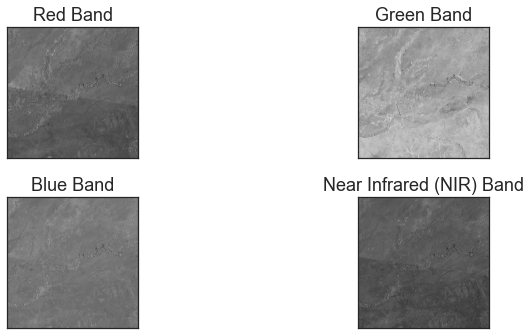

In [24]:
titles = ["Red Band", "Green Band", "Blue Band", "Near Infrared (NIR) Band"]

# Plot all bands using the earthpy function
ep.plot_bands(sample_raster, 
              figsize=(12, 5), 
              cols=2,
              title=titles,
              cbar=False)
plt.show()

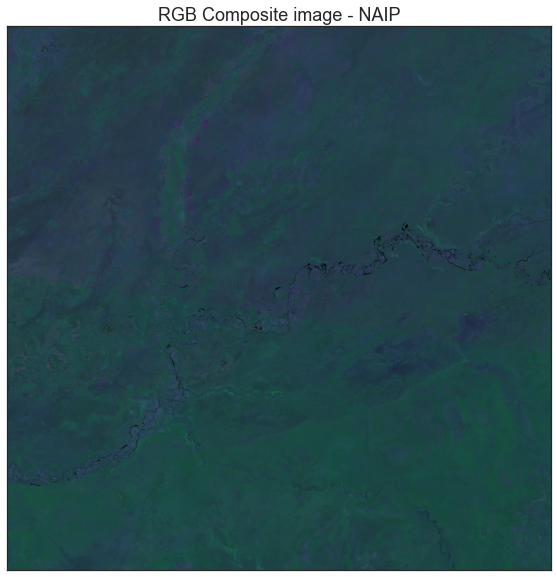

In [25]:
ep.plot_rgb(sample_raster,
            rgb=[0, 1, 2],
            title="RGB Composite image - NAIP")
plt.show()

# Landsat Data - with Windowed (Compressed Version) 

In [52]:
import pprint

# Load & plot the data

# window = rio.windows.Window(1024, 1024, 2560, 2560)

sample_raster_path = "./data/Eco_Labelling/DFCM/dfcm_pforchange_test.tif"


with rio.open(sample_raster_path) as sample_raster_src:
    # Masked = True sets no data values to np.nan if they are in the metadata
    sample_raster = sample_raster_src.read()
    sample_raster_meta = sample_raster_src.profile
    pp = pprint.PrettyPrinter(indent=4)
    pp.pprint(sample_raster_src.bounds)
    pp.pprint(sample_raster_src.crs)

BoundingBox(left=0.0, bottom=-0.279341622, right=0.423506757, top=0.0)
CRS.from_epsg(4326)


In [53]:
sample_raster[0].shape

(30888, 47145)

In [44]:
dir(ep)

['ListedColormap',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_plot_image',
 '_stretch_im',
 'colorbar',
 'draw_legend',
 'es',
 'exposure',
 'hist',
 'ma',
 'make_axes_locatable',
 'make_col_list',
 'mpatches',
 'np',
 'plot_bands',
 'plot_rgb',
 'plt']

In [45]:
sample_raster_meta

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 47145, 'height': 30888, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(8.983068342348076e-06, 0.0, 0.0,
       0.0, -9.043694055944056e-06, 0.0), 'tiled': False, 'interleave': 'band'}

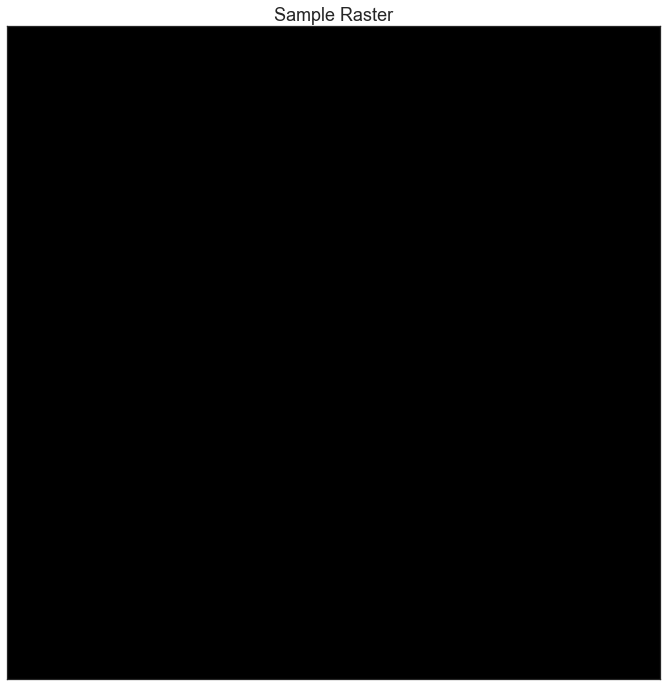

In [47]:
ep.plot_bands(sample_raster[0],
              title="Sample Raster",
              cbar=False)
plt.show()

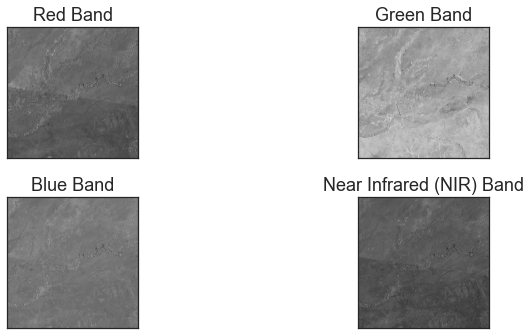

In [24]:
titles = ["Red Band", "Green Band", "Blue Band", "Near Infrared (NIR) Band"]

# Plot all bands using the earthpy function
ep.plot_bands(sample_raster, 
              figsize=(12, 5), 
              cols=2,
              title=titles,
              cbar=False)
plt.show()

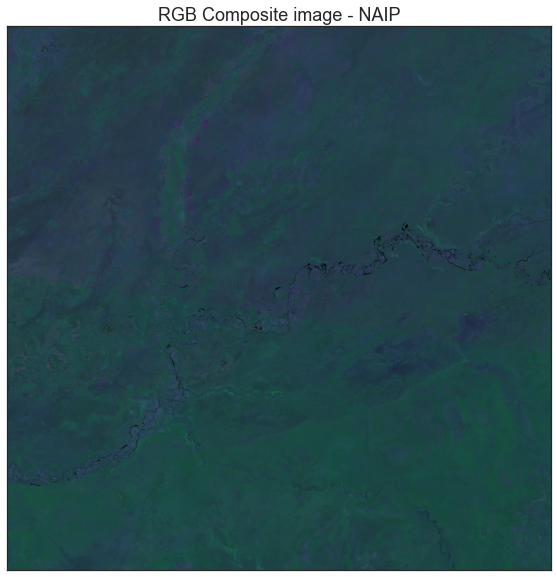

In [25]:
ep.plot_rgb(sample_raster,
            rgb=[0, 1, 2],
            title="RGB Composite image - NAIP")
plt.show()

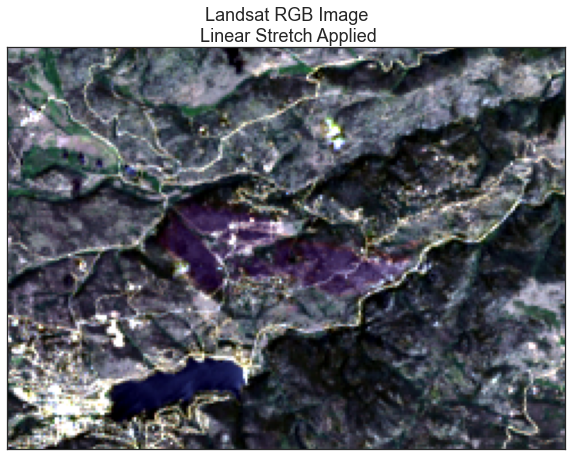

In [553]:
ep.plot_rgb(landsat_post_fire_arr,
            rgb=[3, 2, 1],
            title="Landsat RGB Image\n Linear Stretch Applied",
            stretch=True,
            str_clip=1)
plt.show()

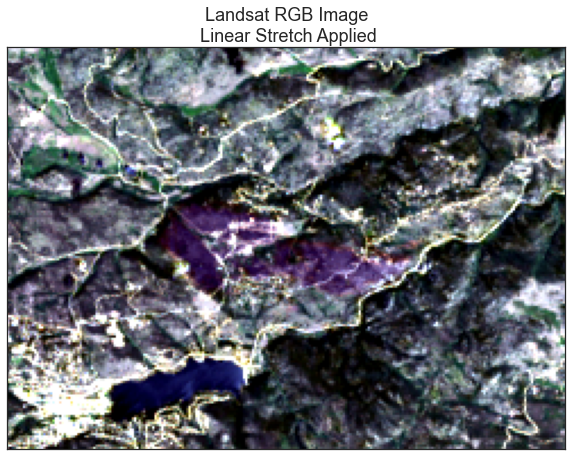

In [555]:
# Adjust the amount of linear stretch to futher brighten the image
# Indicated by the str_clip attribute

ep.plot_rgb(landsat_post_fire_arr,
            rgb=[3, 2, 1],
            title="Landsat RGB Image\n Linear Stretch Applied",
            stretch=True,
            str_clip=4)
plt.show()

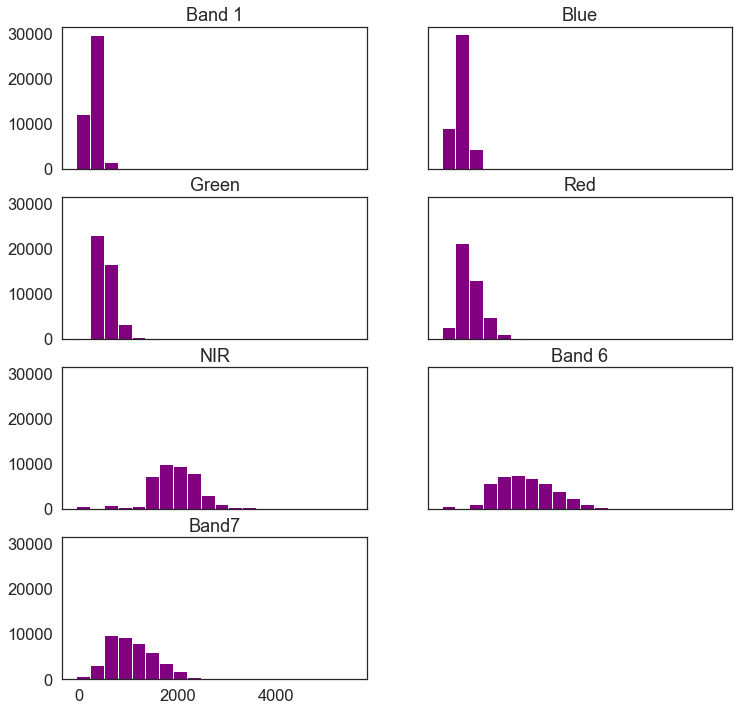

In [558]:
# Plot all band histograms using earthpy
band_titles = ["Band 1", "Blue", "Green", "Red",
               "NIR", "Band 6", "Band7"]

ep.hist(landsat_post_fire_arr,
        title=band_titles)

plt.show()

**Plot CIR**

Now you’ve created a red, green blue color composite image. Remember red green and blue are colors that your eye can see.

Next, create a color infrared image (CIR) using landsat bands: 4,3,2.

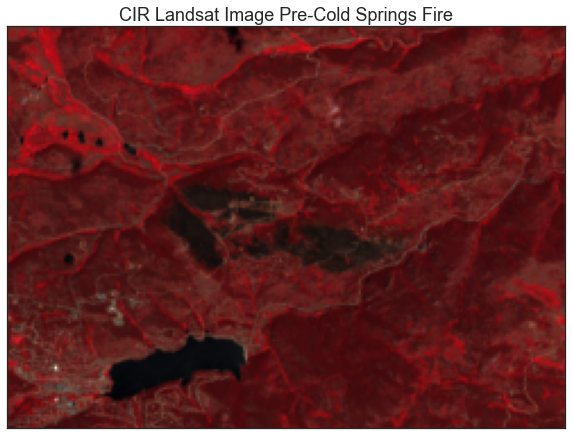

In [559]:
ep.plot_rgb(landsat_post_fire_arr, 
            rgb=[4, 3, 2],
            title="CIR Landsat Image Pre-Cold Springs Fire",
            figsize=(10, 10))
plt.show()

**Plot CIR**

Now you’ve created a red, green blue color composite image. Remember red green and blue are colors that your eye can see.

Next, create a color infrared image (CIR) using landsat bands: 4,3,2.

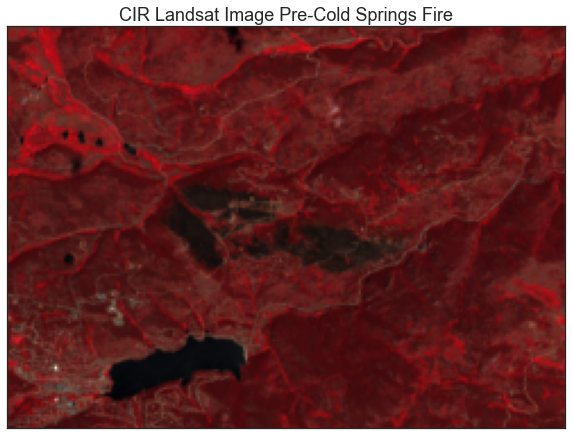

In [559]:
ep.plot_rgb(landsat_post_fire_arr, 
            rgb=[4, 3, 2],
            title="CIR Landsat Image Pre-Cold Springs Fire",
            figsize=(10, 10))
plt.show()